# MLPRegressor

In [1]:
from sklearn import  metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.model_selection import cross_val_score

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

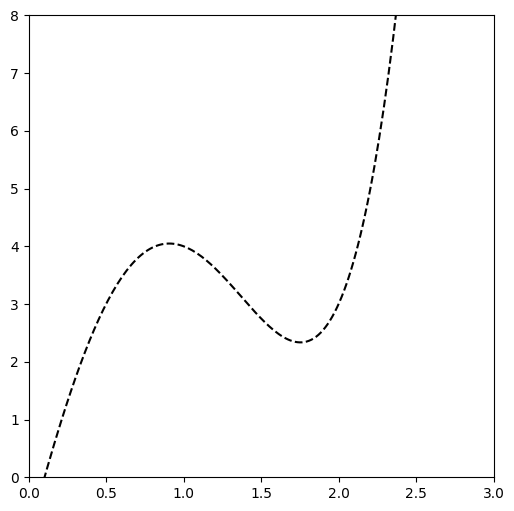

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.show()

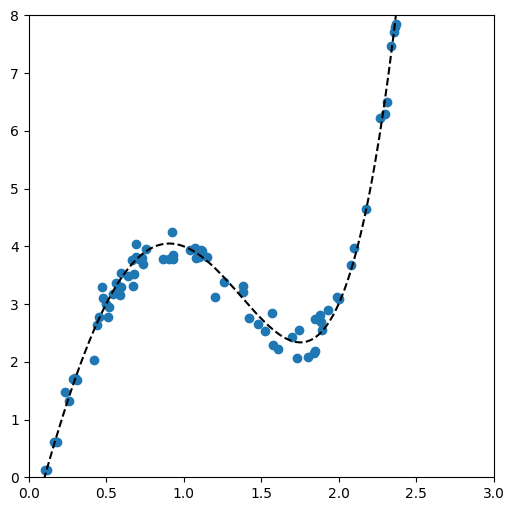

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.scatter(x, y)
plt.show()

# Zadanie
Wykonaj regresję z różnymi parametrami.

In [4]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
y_rbf = MLP.fit(x,y)

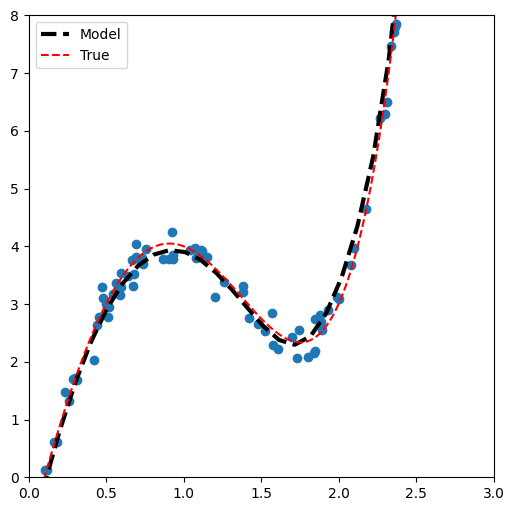

In [5]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y)
plt.plot(x_plot, MLP.predict(x_plot), 'k--',linewidth=3, label='Model')
plt.plot(x_tr, y_tr, '--r', label='True')
plt.legend()
plt.show()

In [6]:
metrics.r2_score(y, MLP.predict(x))

0.9890315388837675

# Zad. 
Wykonaj walidecję krzyżową.

In [7]:
scores = cross_val_score(MLP, x, y, cv=5, scoring='r2')

print(f'R2: {scores.mean():.2f} +/- {scores.std():.2f}')

R2: 0.98 +/- 0.02


In [8]:
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,50,10), (100,)],
    'activation': ['tanh', 'relu'],
    'max_iter': [5000],
    'batch_size': [20],
    'learning_rate_init': [0.001],
    'learning_rate': ['adaptive'],
    'solver': ['adam']
}

grid = GridSearchCV(MLPRegressor(max_iter=5000), param_grid, cv=5, scoring='r2')
grid.fit(x, y)  

/home/krystian/Desktop/AI/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/krystian/Desktop/AI/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=5000),
             param_grid={'activation': ['tanh', 'relu'], 'batch_size': [20],
                         'hidden_layer_sizes': [(50, 50), (100, 50, 10),
                                                (100,)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.001], 'max_iter': [5000],
                         'solver': ['adam']},
             scoring='r2')

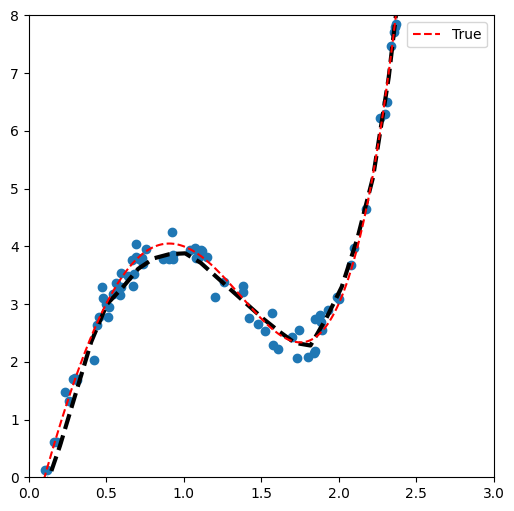

In [9]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y)
plt.plot(x_plot, grid.best_estimator_.predict(x_plot), 'k--',linewidth=3, label='')
plt.plot(x_tr, y_tr, '--r', label='True')
plt.plot()
plt.legend()
plt.show()

In [10]:
metrics.r2_score(y, grid.best_estimator_.predict(x))

0.9979691868871216

# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor
najperw rzeba znalezc i pobrac Advertising.csv dataset 

In [11]:
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio', 'Newspaper']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,50,10), (100,)],
    'activation': ['tanh', 'relu'],
    'max_iter': [5000],
    'batch_size': [20],
    'learning_rate_init': [0.001],
    'learning_rate': ['adaptive'],
    'solver': ['adam']
}

grid = GridSearchCV(MLPRegressor(max_iter=5000), param_grid, cv=5, scoring='r2')
grid.fit(X, y)  

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=5000),
             param_grid={'activation': ['tanh', 'relu'], 'batch_size': [20],
                         'hidden_layer_sizes': [(50, 50), (100, 50, 10),
                                                (100,)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.001], 'max_iter': [5000],
                         'solver': ['adam']},
             scoring='r2')

In [13]:
metrics.r2_score(y, grid.best_estimator_.predict(X))

0.9840915786330724